# DBCV Experiments

### Import necessary packages

In [3]:
%load_ext autoreload
%autoreload 2

import os
import sys

%store -r DISCO_ROOT_FOLDER
if "DISCO_ROOT_FOLDER" in globals():
    os.chdir(DISCO_ROOT_FOLDER)
    sys.path.append(DISCO_ROOT_FOLDER)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from src.Evaluation.dbcv import validity_index as DBCV
from tqdm import tqdm

### Load data

In [5]:
from datasets.density_datasets import Datasets as DensityDatasets

X_cluto_4_8_std, l_cluto_4_8_std = DensityDatasets.cluto_t4_8k.standardized_data_cached_no_noise
X_cluto_8_8_std, l_cluto_8_8_std = DensityDatasets.cluto_t8_8k.standardized_data_cached_no_noise

In [6]:
def run_multiple_shuffle_runs(RUNS, X, l):
    shuffle_report= []
    np.random.seed(0)
    seeds = np.random.choice(10_000, size=RUNS, replace=False)
    for run in tqdm(range(RUNS)):
        np.random.seed(seeds[run])
        shuffle_data_index = np.random.choice(len(X), size=len(X), replace=False)
        X_ = X[shuffle_data_index]
        l_ = l[shuffle_data_index]
        dbcv_shuffle = DBCV(X_, l_,metric='sqeuclidean')
        shuffle_report.append(dbcv_shuffle)
    return shuffle_report

In [4]:
n = 1000

dbcv_list_cluto_4_8_std = run_multiple_shuffle_runs(n, X_cluto_4_8_std, l_cluto_4_8_std)
dbcv_list_cluto_8_8_std = run_multiple_shuffle_runs(n, X_cluto_8_8_std, l_cluto_8_8_std)

100%|██████████| 100/100 [02:25<00:00,  1.45s/it]


In [5]:
dbcv_cluto_8_4_std = pd.DataFrame(data = np.array(dbcv_list_cluto_4_8_std), columns = ['DBCV'])
dbcv_cluto_8_8_std = pd.DataFrame(data = np.array(dbcv_list_cluto_8_8_std), columns = ['DBCV'])

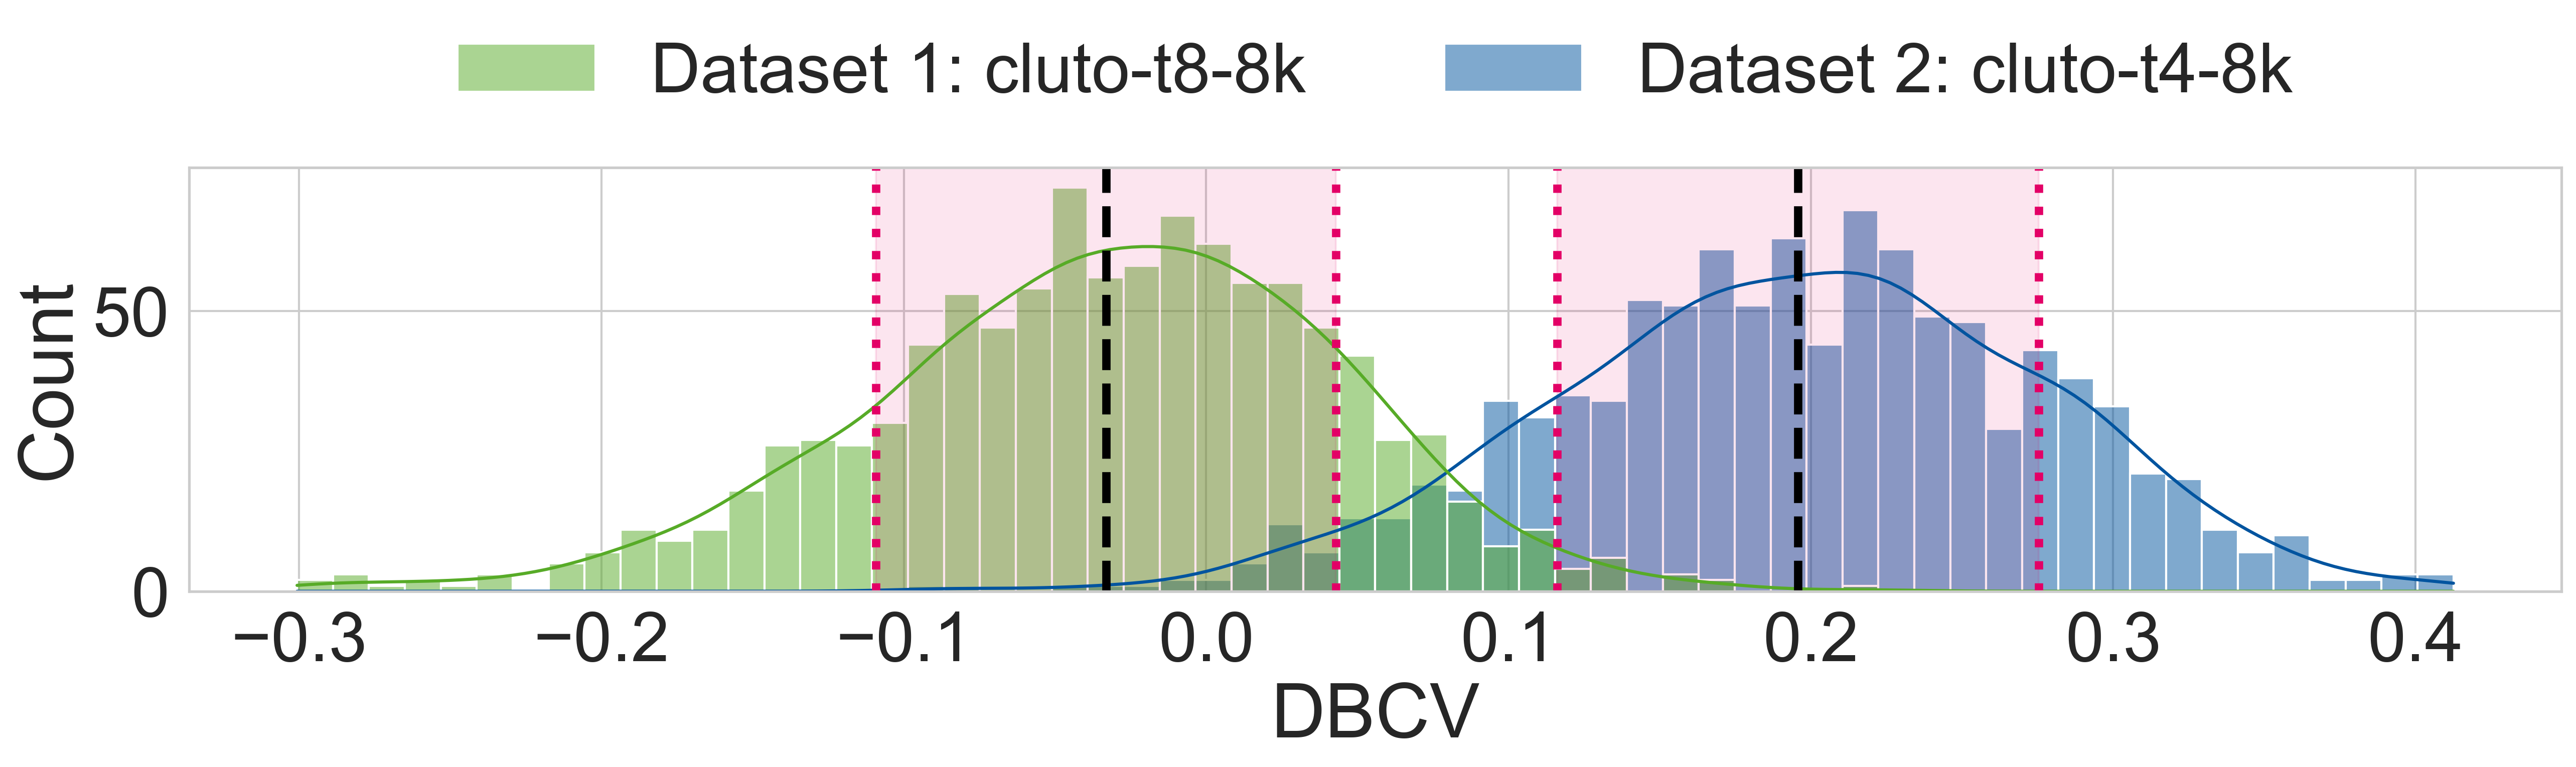

In [22]:
x = dbcv_cluto_8_4_std['DBCV']
y = dbcv_cluto_8_8_std['DBCV']
sns.set(font_scale=3)
df = pd.concat(axis=0, ignore_index=True, objs=[
    pd.DataFrame.from_dict({'DBCV': y, 'Dataset': 'Dataset 1: cluto-t8-8k'}),
    pd.DataFrame.from_dict({'DBCV': x, 'Dataset': 'Dataset 2: cluto-t4-8k'})
])
# Create an array with the colors you want to use
colors = ["#57AB27","#00549F", "#0098A1","#006165",]
# Set your custom color palette
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette(colors))
fig, ax = plt.subplots(figsize=(18,6))
sns.histplot(
    data=df, x='DBCV', hue='Dataset', ax=ax, kde=True, bins=60
)
mean = dbcv_cluto_8_8_std['DBCV'].mean()
std = dbcv_cluto_8_8_std['DBCV'].std()
ax.axvline(mean, color='#000000', linestyle='dashed', linewidth=4)

mean = dbcv_cluto_8_4_std['DBCV'].mean()
std = dbcv_cluto_8_4_std['DBCV'].std()
ax.axvline(mean, color='#000000', linestyle='dashed', linewidth=4)

sns.move_legend( ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,)
plt.tight_layout()
fig.set_dpi(300)

In [7]:
from src.utils.experiments import cache

n = 1000

dbcv_list_cluto_4_8_std = cache(
    "dbcv_list_cluto_4_8_std", run_multiple_shuffle_runs, args=(n, X_cluto_4_8_std, l_cluto_4_8_std)
)
dbcv_list_cluto_8_8_std = cache(
    "dbcv_list_cluto_8_8_std", run_multiple_shuffle_runs, args=(n, X_cluto_8_8_std, l_cluto_8_8_std)
)

 42%|████▏     | 416/1000 [09:27<13:20,  1.37s/it]

In [ ]:
dbcv_cluto_8_4_std = pd.DataFrame(data = np.array(dbcv_list_cluto_4_8_std), columns = ['DBCV'])
dbcv_cluto_8_8_std = pd.DataFrame(data = np.array(dbcv_list_cluto_8_8_std), columns = ['DBCV'])

x = dbcv_cluto_8_4_std['DBCV']
y = dbcv_cluto_8_8_std['DBCV']

df = pd.concat(axis=0, ignore_index=True, objs=[
    pd.DataFrame.from_dict({'DBCV': x, 'Dataset': 'cluto-t4.8k'}),
    pd.DataFrame.from_dict({'DBCV': y, 'Dataset': 'cluto-t8.8k'})
])
# Create an array with the colors you want to use
colors = ["#57AB27","#00549F", "#0098A1","#006165",]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
fig, ax = plt.subplots(figsize=(18,6))
sns.histplot(
    data=df, x='DBCV', hue='Dataset', ax=ax, kde=True, bins=60
)
mean = dbcv_cluto_8_8_std['DBCV'].mean()
std = dbcv_cluto_8_8_std['DBCV'].std()
ax.axvline(mean, color='#000000', linestyle='dashed', linewidth=4)
ax.axvline(mean-std, color='#E30066', linestyle='dotted', linewidth=4)
ax.axvline(mean+std, color='#E30066', linestyle='dotted', linewidth=4)
ax.axvspan(mean-std, mean+std, alpha=0.1, color='#E30066')

mean = dbcv_cluto_8_4_std['DBCV'].mean()
std = dbcv_cluto_8_4_std['DBCV'].std()
ax.axvline(mean, color='#000000', linestyle='dashed', linewidth=4)
ax.axvline(mean-std, color='#E30066', linestyle='dotted', linewidth=4)
ax.axvline(mean+std, color='#E30066', linestyle='dotted', linewidth=4)
ax.axvspan(mean-std, mean+std, alpha=0.1, color='#E30066')

sns.move_legend(ax, bbox_to_anchor=(1, 0.5), loc='center left', frameon=False)
plt.tight_layout()
fig.set_dpi(300)
plt.savefig("DBCV.pdf", dpi=300, format="pdf", bbox_inches="tight", pad_inches=0)